## Banknote authentication

#### Name:Shreyas Dinesh Patil


## Dataset:

Banknote authentication Dataset: Data were extracted from images that were taken from genuine and forged banknote- like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

A)Download the Skin Segmentation data from:https://archive.ics.uci.edu/ ml/datasets/banknote+authentication#.

## (B)Pre-Processing and Exploratory data analysis:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

A = np.loadtxt("data_banknote_authentication.txt", delimiter=',')
Total_data = len(A)
X = A[:, 0:4]
f1 = X[:, 0]
f2 = X[:, 1]
f3 = X[:, 2]
f4 = X[:, 3]
y = A[:, 4]

zeros = 0
ones = 0
for i in range(Total_data):
    if y[i] == 0:
        zeros += 1
    else:
        ones += 1
        

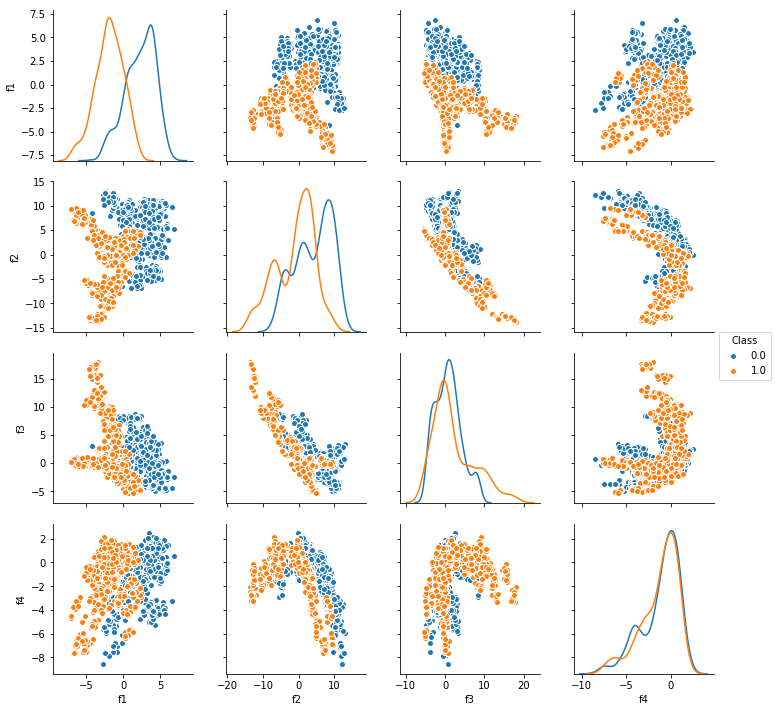

In [14]:
#Scatterplot
import seaborn as sns
df = pd.DataFrame(A, columns=['f1', 'f2', 'f3', 'f4', 'Class'])
grid = sns.pairplot(data=df, kind='scatter', vars = ['f1', 'f2', 'f3', 'f4'], hue='Class', diag_kind='kde')
plt.show()

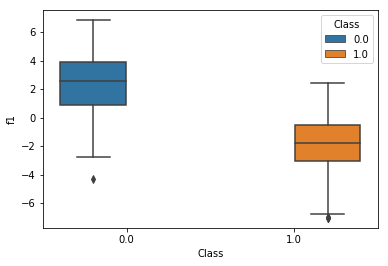

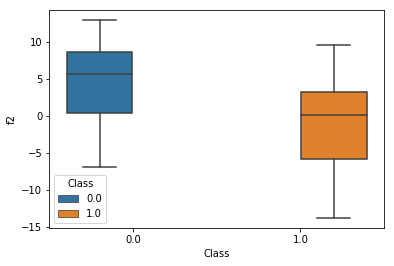

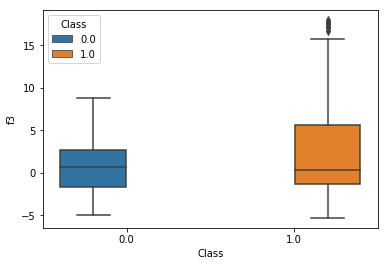

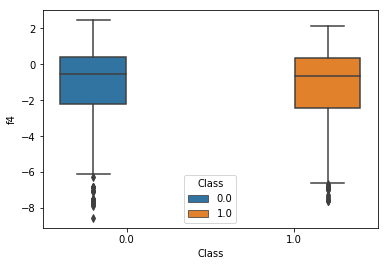

In [12]:
#Boxplot
sns.boxplot(y='f1', x='Class', hue='Class', data=df)
plt.figure()
sns.boxplot(y='f2', x='Class', hue='Class', data=df)
plt.figure()
sns.boxplot(y='f3', x='Class', hue='Class', data=df)
plt.figure()
sns.boxplot(y='f4', x='Class', hue='Class', data=df)
plt.figure()

Boxplots for each of the independent variables(features)

In [5]:
#PART B 3:
#TEST DATA
tst1 = X[0:200]
tst2 = X[zeros:zeros+200]
tst = np.concatenate([tst1, tst2])

tst_y1 = y[0:200]
tst_y2 = y[zeros:zeros+200]
tst_y = np.concatenate([tst_y1, tst_y2])

#Train Data
trn1 = X[200:zeros]
trn2 = X[zeros+200:Total_data]
trn = np.concatenate([trn1, trn2])

trn_y1 = y[200:zeros]
trn_y2 = y[zeros+200:Total_data]
trn_y = np.concatenate([trn_y1, trn_y2])

## Classification using KNN

##### K-nearest neighbors with Euclidean metric using Scikit-learn library.

The most suitable K* among all Ks is 1


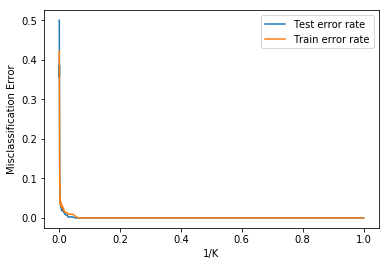

Confusion_matrix is 
 [[200   0]
 [  0 200]]
TPR = 1.0
TNR = 1.0
The Precision when k is optimal = 1.0
F1 score for optimal k = 1.0


In [18]:
# PART C 1:
#KNN using packages
MCE_tst = []
MCE_trn = []
inv_K = []
for K in range(1, 901, 3):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(trn, trn_y)
    y_pred = knn.predict(tst)
    y_pred1 = knn.predict(trn)
    accuracy_tst = metrics.accuracy_score(tst_y, y_pred)
    accuracy_trn = metrics.accuracy_score(trn_y, y_pred1)
    
    error_rate_tst = 1 - accuracy_tst
    error_rate_trn = 1 - accuracy_trn
    MCE_tst.append(error_rate_tst)
    MCE_trn.append(error_rate_trn)
    inv_K.append(1/K)



optimal_k = range(1, 901, 3)[MCE_tst.index(min(MCE_tst))]
print('The most suitable K* among all Ks is', optimal_k)
plt.plot(inv_K, MCE_tst, label='Test error rate')
plt.plot(inv_K, MCE_trn, label='Train error rate')
plt.xlabel('1/K')
plt.ylabel('Misclassification Error')
plt.legend()
plt.show()



knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(trn, trn_y)
y_pred = knn.predict(tst)
cm = confusion_matrix(tst_y, y_pred)
print('Confusion_matrix is \n', cm)
TP = cm[0, 0]
TN = cm[1, 1]
FN = cm[0, 1]
FP = cm[1, 0]



TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
print('TPR =', TPR)
print('TNR =', TNR)
print('The Precision when k is optimal =', metrics.precision_score(tst_y, y_pred))
print('F1 score for optimal k =', metrics.f1_score(tst_y, y_pred))



#### (c) Learning Curve(Best error rate for some K vs size of the data)

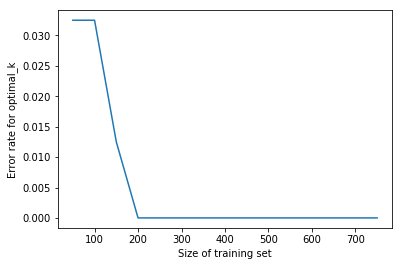

In [7]:
# PART C 3:
optimal_k = []
error_rate = []
min_error_rate = []
for N in range(50, 800, 50):
    tn1 = X[200:200 + int(N/2)]
    tn2 = X[zeros + 200:zeros + 200 + int(N/2)]
    tn = np.concatenate([tn1, tn2])

    tn_y1 = y[200:200 + int(N/2)]
    tn_y2 = y[zeros + 200:zeros + 200 + int(N/2)]
    tn_y = np.concatenate([tn_y1, tn_y2])

    #print(trn)

    for K in range(1, N, 40):
        knn = KNeighborsClassifier(n_neighbors=K)
        knn.fit(tn, tn_y)
        y_pred = knn.predict(tst)
        accuracy = metrics.accuracy_score(tst_y, y_pred)
        error_rate.append(1 - accuracy)
    #min_error_rate = min(error_rate)
    min_error_rate.append(min(error_rate))

plt.plot(range(50, 800, 50), min_error_rate)
plt.xlabel('Size of training set')
plt.ylabel('Error rate for optimal_k')
plt.show()


## Variants of KNN with different distance metrics.

Test errors for optimal_k where k is [1,11,21,... 901] for distance metrics Mahalanobis,Manhattan and Chebyshev. Summary of test errors in a table.

In [13]:
# PART D 1&2:

# Best test errors for Minkowski, Chebyshev and Mahalanobis Distances.

# PART D 1:

error_rate = []
error_rate1 = []
error_rate2 = []
optimal_k = []
MCE = []

Best_error_rate = 1
Best_error_rate1 = 1
Best_error_rate2 = 1
Table = pd.DataFrame(A, columns=['f1', 'f2', 'f3', 'f4', 'Class'])
for K in range(1, 901, 10):
    knn = KNeighborsClassifier(n_neighbors=K,  metric='minkowski', p=1)
    knn1 = KNeighborsClassifier(n_neighbors=K, metric='chebyshev')
    knn2 = KNeighborsClassifier(n_neighbors=K, metric='mahalanobis', metric_params={'V': np.cov(trn.T)})
    knn.fit(trn, trn_y)
    knn1.fit(trn, trn_y)
    knn2.fit(trn, trn_y)
    y_pred = knn.predict(tst)
    y_pred1 = knn1.predict(tst)
    y_pred2 = knn2.predict(tst)
    accuracy = metrics.accuracy_score(tst_y, y_pred)
    accuracy1 = metrics.accuracy_score(tst_y, y_pred1)
    accuracy2 = metrics.accuracy_score(tst_y, y_pred2)
    error = 1 - accuracy
    error1 = 1 - accuracy1
    error2 = 1 - accuracy2

    error_rate.append(error)
    error_rate1.append(error1)
    error_rate2.append(error2)

    if error <= Best_error_rate:
        Best_error_rate = error
        k = K
    if error1 <= Best_error_rate1:
        Best_error_rate1 = error1
        k1 = K
    if error2 <= Best_error_rate2:
        Best_error_rate2 = error2
        k2 = K

optimal_k.append(k)
optimal_k.append(k1)
optimal_k.append(k2)
MCE.append(Best_error_rate)
MCE.append(Best_error_rate1)
MCE.append(Best_error_rate2)

optimal_k.append(k)
optimal_k.append(k1)
optimal_k.append(k2)


data = np.array([[optimal_k[0], MCE[0], '', ''],
                [optimal_k[1], '', MCE[1], ''],

                 [optimal_k[2], '', '',  MCE[2]]])
Table = pd.DataFrame(data, columns=['K*', 'Manhattan', 'Chebyshev', 'Mahalanobis'])
print(Table)

#Part D (i) B-code for best log10(p):

def dist(x, y, **kwargs):
    p = kwargs['t']
    D = np.sum(abs(np.subtract(x, y))**p)**(1/p)
    return D
error = []
for log_p in np.arange(0.1, 1.1, 0.1):
    q = 10**log_p
    knn = KNeighborsClassifier(n_neighbors=optimal_k[0], metric=dist, metric_params={'t': q})
    knn.fit(trn, trn_y)
    y_pred = knn.predict(tst)
    accuracy = metrics.accuracy_score(tst_y, y_pred)
    error.append(1 - accuracy)

print('The best log_p is', log_p)

   K* Manhattan Chebyshev Mahalanobis
0  11       0.0                      
1  11                 0.0            
2  11                             0.0
The best log_p is 1.0


## (E)KNN using weighted decision:

In this the weight of each point in voting is proportional to its distance from the query/test
data point.

In [8]:
# PART E:
error = []
error1 = []
error2 = []
for K in range(1, 901, 10):
    knn = KNeighborsClassifier(n_neighbors=K, weights='distance')
    knn1 = KNeighborsClassifier(n_neighbors=K, weights='distance', metric='minkowski', p=1)
    knn2 = KNeighborsClassifier(n_neighbors=K, weights='distance', metric='chebyshev')
    knn.fit(trn, trn_y)
    knn1.fit(trn, trn_y)
    knn2.fit(trn, trn_y)
    y_pred = knn.predict(tst)
    y_pred1 = knn1.predict(tst)
    y_pred2 = knn2.predict(tst)
    accuracy = metrics.accuracy_score(tst_y, y_pred)
    accuracy1 = metrics.accuracy_score(tst_y, y_pred1)
    accuracy2 = metrics.accuracy_score(tst_y, y_pred2)
    error.append(1 - accuracy)
    error1.append(1 - accuracy1)
    error2.append(1 - accuracy2)
best_error = min(error)
best_error1 = min(error1)
best_error2 = min(error2)
print('The best test error rate for Euclidean distance is', best_error)
print('The best test error rate for Manhattan distance is', best_error1)
print('The best test error rate for Chebyshev distance is', best_error2)

The best test error rate for Euclidean distance is 0.0
The best test error rate for Manhattan distance is 0.0
The best test error rate for Chebyshev distance is 0.0


#### (F) Lowest training error rate achieved in this exercise.

In [10]:
#PART F:
print('The lowest training error rate achieved in this exercise is', min(MCE_trn))

The lowest training error rate achieved in this exercise is 0.0


## References

(1) https://archive.ics.uci.edu/ml/datasets/banknote+authentication#. Dataset link.

(2) Matplotlib Documentation.

(3) Pandas Documentation. Webpage link:http://pandas.pydata.org/pandas-docs/version/0.23/

(4) Numpy Documentation. Webpage link:https://docs.scipy.org/doc/numpy/

(5) Stackoverflow. Website link:https://stackoverflow.com/